In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingAustria.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,12911,2014-12-02,Austria,48.215747,16.374918,4.0,1.0,2.0,2.0,69.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12
1,12912,2014-11-08,Austria,48.225823,16.401469,2.0,1.0,1.0,1.0,69.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,11
2,12913,2010-08-27,Austria,48.214652,16.379914,3.0,1.0,1.0,1.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,8
3,12914,2012-02-14,Austria,48.222464,16.387926,2.0,1.0,1.0,1.0,75.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
4,12915,2015-09-02,Austria,48.216764,16.384622,3.0,1.0,2.0,2.0,87.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,485185,2011-07-11,Austria,48.208013,16.389474,4.0,1.5,1.0,2.0,77.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7
6407,485186,2015-05-11,Austria,48.209944,16.387886,6.0,1.5,3.0,3.0,69.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,5
6408,485187,2012-01-23,Austria,48.205949,16.395868,10.0,1.5,3.0,6.0,72.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
6409,485188,2013-07-08,Austria,48.194687,16.387165,2.0,1.0,1.0,1.0,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7


<AxesSubplot:ylabel='Frequency'>

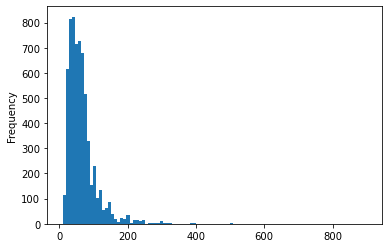

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,12911,2014-12-02,Austria,48.215747,16.374918,4.0,1.0,2.0,2.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12,group_2
1,12912,2014-11-08,Austria,48.225823,16.401469,2.0,1.0,1.0,1.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,11,group_2
2,12913,2010-08-27,Austria,48.214652,16.379914,3.0,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,8,group_2
3,12914,2012-02-14,Austria,48.222464,16.387926,2.0,1.0,1.0,1.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,group_2
4,12915,2015-09-02,Austria,48.216764,16.384622,3.0,1.0,2.0,2.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,9,group_2


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_1    0.460218
group_2    0.427067
group_3    0.073518
group_4    0.021256
group_5    0.017941
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_1    0.459860
group_2    0.427124
group_3    0.074045
group_4    0.021044
group_5    0.017927
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
1886,165669,2015-05-16,Austria,48.220294,16.376812,4.0,1.0,1.0,2.0,59.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5
6044,467930,2017-02-17,Austria,48.211348,16.393442,6.0,1.0,2.0,6.0,240.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,2
387,38783,2014-07-10,Austria,48.195604,16.365864,2.0,1.0,1.0,1.0,85.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,7
3331,254880,2015-01-14,Austria,48.204497,16.338459,2.0,1.0,1.0,1.0,15.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1
1396,122502,2015-02-15,Austria,48.224920,16.342626,2.0,1.0,1.0,2.0,35.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,2


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
5442,48.188878,16.372905,4.0,1.0,1.0,2.0,65.0,1.0,0.0,1.0,1125.0,19.0,1.0,0.0,0.0,2,2
2857,48.212420,16.369419,5.0,1.0,1.0,4.0,120.0,3.0,15.0,1.0,1125.0,46.0,1.0,0.0,0.0,1,9
4408,48.197304,16.348904,8.0,1.0,3.0,8.0,90.0,2.0,25.0,5.0,180.0,16.0,1.0,0.0,0.0,0,9
4358,48.195867,16.404293,4.0,1.0,1.0,1.0,65.0,2.0,12.0,1.0,1125.0,23.0,1.0,0.0,0.0,0,11
3563,48.266665,16.390471,2.0,1.0,1.0,2.0,50.0,1.0,0.0,1.0,1125.0,3.0,1.0,0.0,0.0,0,2


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
1886,59.0
6044,240.0
387,85.0
3331,15.0
1396,35.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
1886,48.220294,16.376812,4.0,1.0,1.0,2.0,2.0,25.0,4.0,1125.0,4.0,1.0,0.0,0.0,5,5
6044,48.211348,16.393442,6.0,1.0,2.0,6.0,1.0,0.0,2.0,31.0,1.0,1.0,0.0,0.0,4,2
387,48.195604,16.365864,2.0,1.0,1.0,1.0,2.0,30.0,2.0,1125.0,52.0,1.0,0.0,0.0,3,7
3331,48.204497,16.338459,2.0,1.0,1.0,1.0,1.0,8.0,2.0,40.0,4.0,0.0,1.0,0.0,2,1
1396,48.224920,16.342626,2.0,1.0,1.0,2.0,1.0,15.0,3.0,1125.0,2.0,0.0,1.0,0.0,6,2


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
5442,65.0
2857,120.0
4408,90.0
4358,65.0
3563,50.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
5442,48.188878,16.372905,4.0,1.0,1.0,2.0,1.0,0.0,1.0,1125.0,19.0,1.0,0.0,0.0,2,2
2857,48.212420,16.369419,5.0,1.0,1.0,4.0,3.0,15.0,1.0,1125.0,46.0,1.0,0.0,0.0,1,9
4408,48.197304,16.348904,8.0,1.0,3.0,8.0,2.0,25.0,5.0,180.0,16.0,1.0,0.0,0.0,0,9
4358,48.195867,16.404293,4.0,1.0,1.0,1.0,2.0,12.0,1.0,1125.0,23.0,1.0,0.0,0.0,0,11
3563,48.266665,16.390471,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1125.0,3.0,1.0,0.0,0.0,0,2


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_23284/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

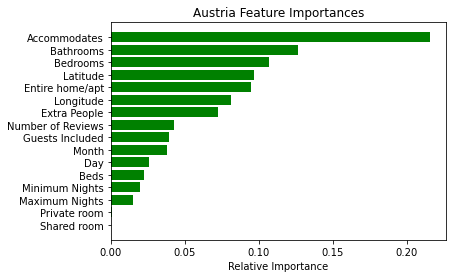

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Austria Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

128.66879475429016 11.343226822835298 6.212903666146645


In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)